# Azure AI Vision

We will explore the following in the class:
* Example Image Analysis
* Example Image Classification
* Example Text Extraction from Image (OCR)

In [1]:
! pip install azure-ai-vision-imageanalysis

In [12]:
%reset -f

In [20]:
! conda info --envs

# conda environments:
#
base                     /anaconda
azureml_py310_sdkv2      /anaconda/envs/azureml_py310_sdkv2
azureml_py38             /anaconda/envs/azureml_py38
azureml_py38_PT_TF       /anaconda/envs/azureml_py38_PT_TF
jupyter_env              /anaconda/envs/jupyter_env



In [80]:
import os
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

## Importing Azure AI Vision Modules

In [3]:
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential

## Secrets 
**Bad Practice to expose like below, this is just for illustration**

In [4]:
ai_endpoint = 'https://tatwanai.cognitiveservices.azure.com/'
ai_key = '0ab4e155c4494adc90cc94fbd5e39c97'

In [5]:
# Authenticate Azure AI Vision client
cv_client = ImageAnalysisClient(
    endpoint=ai_endpoint,
    credential=AzureKeyCredential(ai_key)
)

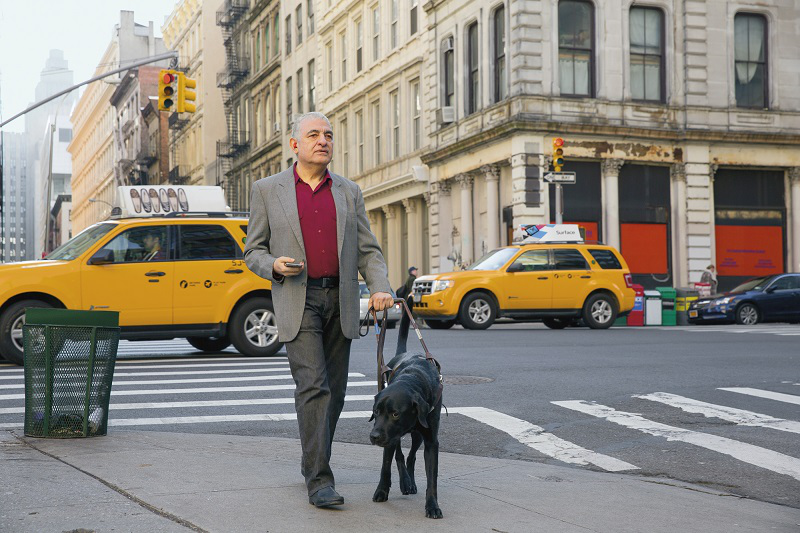

In [91]:
image_file = r'street.jpg'

im = Image.open(image_file) 
im

In [92]:
with open(image_file, "rb") as f:
    image_data = f.read()

In [93]:
 print(image_data)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00d\x00d\x00\x00\xff\xe1\x1e\x8eExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x10\x01\x00\x00\x03\x00\x00\x00\x01\x16\x80\x00\x00\x01\x01\x00\x03\x00\x00\x00\x01\x0f\x00\x00\x00\x01\x02\x00\x03\x00\x00\x00\x04\x00\x00\x00\xce\x01\x03\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x06\x00\x03\x00\x00\x00\x01\x00\x05\x00\x00\x01\x0f\x00\x02\x00\x00\x00\x06\x00\x00\x00\xd6\x01\x10\x00\x02\x00\x00\x00\x16\x00\x00\x00\xdc\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x15\x00\x03\x00\x00\x00\x01\x00\x04\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00\xf2\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00\xfa\x01\x1c\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00\x1e\x00\x00\x01\x02\x012\x00\x02\x00\x00\x00\x14\x00\x00\x01 \x87i\x00\x04\x00\x00\x00\x01\x00\x00\x014\x00\x00\x03|\x00\x08\x00\x08\x00\x08\x00\x08Canon\x00Canon EOS 5D Mark III\x00\x00\x0fB@\x00\x00\'\x10\x00\x0fB@\x00\x00\'\x10

## Image Analysis

In [94]:
result = cv_client.analyze(
    image_data=image_data,
    visual_features=[
        VisualFeatures.CAPTION,
        VisualFeatures.DENSE_CAPTIONS,
        VisualFeatures.TAGS,
        VisualFeatures.OBJECTS,
        VisualFeatures.PEOPLE],
)

In [95]:
result.keys()

dict_keys(['modelVersion', 'captionResult', 'denseCaptionsResult', 'metadata', 'tagsResult', 'objectsResult', 'peopleResult'])

In [96]:
result['captionResult']

{'text': 'a man walking a dog on a leash on a street', 'confidence': 0.8204520344734192}

In [97]:
print(f"Caption : {result['captionResult'].text}")
print(f"Confidence : {result['captionResult'].confidence}")

Caption : a man walking a dog on a leash on a street
Confidence : 0.8204520344734192


In [98]:
result['denseCaptionsResult']

{'values': [{'text': 'a man walking a dog on a leash on a street', 'confidence': 0.8204520344734192, 'boundingBox': {'x': 0, 'y': 0, 'w': 800, 'h': 533}}, {'text': 'a man walking on a street', 'confidence': 0.6903219819068909, 'boundingBox': {'x': 236, 'y': 106, 'w': 156, 'h': 400}}, {'text': 'a yellow car on the street', 'confidence': 0.7817369103431702, 'boundingBox': {'x': 408, 'y': 237, 'w': 229, 'h': 92}}, {'text': 'a black dog walking on the street', 'confidence': 0.7532556653022766, 'boundingBox': {'x': 365, 'y': 293, 'w': 77, 'h': 223}}, {'text': 'a blurry image of a blue car', 'confidence': 0.8202926516532898, 'boundingBox': {'x': 683, 'y': 270, 'w': 115, 'h': 53}}, {'text': 'a yellow taxi cab on the street', 'confidence': 0.7242479920387268, 'boundingBox': {'x': 0, 'y': 205, 'w': 275, 'h': 149}}]}

In [99]:
result['denseCaptionsResult'].list

[{'text': 'a man walking a dog on a leash on a street', 'confidence': 0.8204520344734192, 'boundingBox': {'x': 0, 'y': 0, 'w': 800, 'h': 533}},
 {'text': 'a man walking on a street', 'confidence': 0.6903219819068909, 'boundingBox': {'x': 236, 'y': 106, 'w': 156, 'h': 400}},
 {'text': 'a yellow car on the street', 'confidence': 0.7817369103431702, 'boundingBox': {'x': 408, 'y': 237, 'w': 229, 'h': 92}},
 {'text': 'a black dog walking on the street', 'confidence': 0.7532556653022766, 'boundingBox': {'x': 365, 'y': 293, 'w': 77, 'h': 223}},
 {'text': 'a blurry image of a blue car', 'confidence': 0.8202926516532898, 'boundingBox': {'x': 683, 'y': 270, 'w': 115, 'h': 53}},
 {'text': 'a yellow taxi cab on the street', 'confidence': 0.7242479920387268, 'boundingBox': {'x': 0, 'y': 205, 'w': 275, 'h': 149}}]

In [100]:
for caption in result['denseCaptionsResult'].list:
    print(caption)

{'text': 'a man walking a dog on a leash on a street', 'confidence': 0.8204520344734192, 'boundingBox': {'x': 0, 'y': 0, 'w': 800, 'h': 533}}
{'text': 'a man walking on a street', 'confidence': 0.6903219819068909, 'boundingBox': {'x': 236, 'y': 106, 'w': 156, 'h': 400}}
{'text': 'a yellow car on the street', 'confidence': 0.7817369103431702, 'boundingBox': {'x': 408, 'y': 237, 'w': 229, 'h': 92}}
{'text': 'a black dog walking on the street', 'confidence': 0.7532556653022766, 'boundingBox': {'x': 365, 'y': 293, 'w': 77, 'h': 223}}
{'text': 'a blurry image of a blue car', 'confidence': 0.8202926516532898, 'boundingBox': {'x': 683, 'y': 270, 'w': 115, 'h': 53}}
{'text': 'a yellow taxi cab on the street', 'confidence': 0.7242479920387268, 'boundingBox': {'x': 0, 'y': 205, 'w': 275, 'h': 149}}


In [101]:
for caption in result['denseCaptionsResult'].list:
    print(caption['text'])

a man walking a dog on a leash on a street
a man walking on a street
a yellow car on the street
a black dog walking on the street
a blurry image of a blue car
a yellow taxi cab on the street


In [102]:
for caption in result['denseCaptionsResult'].list:
    print(caption['text'], caption['confidence'])

a man walking a dog on a leash on a street 0.8204520344734192
a man walking on a street 0.6903219819068909
a yellow car on the street 0.7817369103431702
a black dog walking on the street 0.7532556653022766
a blurry image of a blue car 0.8202926516532898
a yellow taxi cab on the street 0.7242479920387268


In [103]:
result['objectsResult'].list

[{'boundingBox': {'x': 0, 'y': 212, 'w': 282, 'h': 149}, 'tags': [{'name': 'car', 'confidence': 0.724}]},
 {'boundingBox': {'x': 408, 'y': 231, 'w': 242, 'h': 102}, 'tags': [{'name': 'taxi', 'confidence': 0.77}]},
 {'boundingBox': {'x': 245, 'y': 133, 'w': 143, 'h': 355}, 'tags': [{'name': 'person', 'confidence': 0.781}]},
 {'boundingBox': {'x': 363, 'y': 326, 'w': 90, 'h': 192}, 'tags': [{'name': 'dog', 'confidence': 0.544}]}]

In [104]:
for tags in result['objectsResult'].list:
    print(tags['tags'])

[{'name': 'car', 'confidence': 0.724}]
[{'name': 'taxi', 'confidence': 0.77}]
[{'name': 'person', 'confidence': 0.781}]
[{'name': 'dog', 'confidence': 0.544}]


## OCR - Extract Text from Images

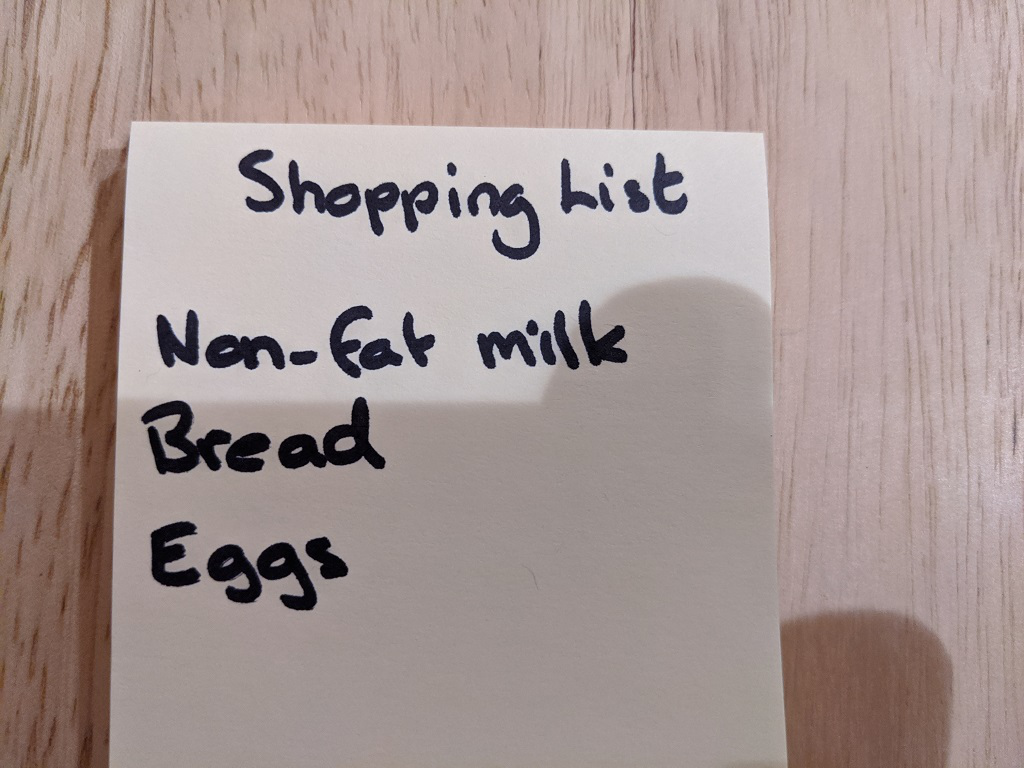

In [105]:
image_file = r'Note.jpg'

im = Image.open(image_file) 
im

Remember earlier we specified the following

```python
result = cv_client.analyze(
    image_data=image_data,
    visual_features=[
        VisualFeatures.CAPTION,
        VisualFeatures.DENSE_CAPTIONS,
        VisualFeatures.TAGS,
        VisualFeatures.OBJECTS,
        VisualFeatures.PEOPLE],
)
```

In [106]:
with open(image_file, "rb") as f:
    image_data = f.read()

In [107]:
 ocr_result = cv_client.analyze(
     image_data=image_data,
     visual_features=[
        VisualFeatures.READ
        ]
 )

In [108]:
ocr_result

{'modelVersion': '2023-10-01', 'metadata': {'width': 1024, 'height': 768}, 'readResult': {'blocks': [{'lines': [{'text': 'Shopping List', 'boundingPolygon': [{'x': 231, 'y': 141}, {'x': 693, 'y': 147}, {'x': 691, 'y': 245}, {'x': 230, 'y': 240}], 'words': [{'text': 'Shopping', 'boundingPolygon': [{'x': 240, 'y': 141}, {'x': 535, 'y': 149}, {'x': 531, 'y': 245}, {'x': 234, 'y': 234}], 'confidence': 0.963}, {'text': 'List', 'boundingPolygon': [{'x': 554, 'y': 149}, {'x': 689, 'y': 147}, {'x': 686, 'y': 244}, {'x': 550, 'y': 245}], 'confidence': 0.83}]}, {'text': 'Non- Fat milk', 'boundingPolygon': [{'x': 149, 'y': 302}, {'x': 633, 'y': 297}, {'x': 633, 'y': 374}, {'x': 150, 'y': 378}], 'words': [{'text': 'Non-', 'boundingPolygon': [{'x': 150, 'y': 303}, {'x': 309, 'y': 301}, {'x': 310, 'y': 378}, {'x': 153, 'y': 378}], 'confidence': 0.577}, {'text': 'Fat', 'boundingPolygon': [{'x': 324, 'y': 301}, {'x': 438, 'y': 300}, {'x': 437, 'y': 378}, {'x': 325, 'y': 378}], 'confidence': 0.842}, {'

In [117]:
ocr_result

{'modelVersion': '2023-10-01', 'metadata': {'width': 1024, 'height': 768}, 'readResult': {'blocks': [{'lines': [{'text': 'Shopping List', 'boundingPolygon': [{'x': 231, 'y': 141}, {'x': 693, 'y': 147}, {'x': 691, 'y': 245}, {'x': 230, 'y': 240}], 'words': [{'text': 'Shopping', 'boundingPolygon': [{'x': 240, 'y': 141}, {'x': 535, 'y': 149}, {'x': 531, 'y': 245}, {'x': 234, 'y': 234}], 'confidence': 0.963}, {'text': 'List', 'boundingPolygon': [{'x': 554, 'y': 149}, {'x': 689, 'y': 147}, {'x': 686, 'y': 244}, {'x': 550, 'y': 245}], 'confidence': 0.83}]}, {'text': 'Non- Fat milk', 'boundingPolygon': [{'x': 149, 'y': 302}, {'x': 633, 'y': 297}, {'x': 633, 'y': 374}, {'x': 150, 'y': 378}], 'words': [{'text': 'Non-', 'boundingPolygon': [{'x': 150, 'y': 303}, {'x': 309, 'y': 301}, {'x': 310, 'y': 378}, {'x': 153, 'y': 378}], 'confidence': 0.577}, {'text': 'Fat', 'boundingPolygon': [{'x': 324, 'y': 301}, {'x': 438, 'y': 300}, {'x': 437, 'y': 378}, {'x': 325, 'y': 378}], 'confidence': 0.842}, {'

In [109]:
ocr_result.keys()

dict_keys(['modelVersion', 'metadata', 'readResult'])

In [119]:
ocr_result['readResult'].blocks[0].lines

[{'text': 'Shopping List', 'boundingPolygon': [{'x': 231, 'y': 141}, {'x': 693, 'y': 147}, {'x': 691, 'y': 245}, {'x': 230, 'y': 240}], 'words': [{'text': 'Shopping', 'boundingPolygon': [{'x': 240, 'y': 141}, {'x': 535, 'y': 149}, {'x': 531, 'y': 245}, {'x': 234, 'y': 234}], 'confidence': 0.963}, {'text': 'List', 'boundingPolygon': [{'x': 554, 'y': 149}, {'x': 689, 'y': 147}, {'x': 686, 'y': 244}, {'x': 550, 'y': 245}], 'confidence': 0.83}]},
 {'text': 'Non- Fat milk', 'boundingPolygon': [{'x': 149, 'y': 302}, {'x': 633, 'y': 297}, {'x': 633, 'y': 374}, {'x': 150, 'y': 378}], 'words': [{'text': 'Non-', 'boundingPolygon': [{'x': 150, 'y': 303}, {'x': 309, 'y': 301}, {'x': 310, 'y': 378}, {'x': 153, 'y': 378}], 'confidence': 0.577}, {'text': 'Fat', 'boundingPolygon': [{'x': 324, 'y': 301}, {'x': 438, 'y': 300}, {'x': 437, 'y': 378}, {'x': 325, 'y': 378}], 'confidence': 0.842}, {'text': 'milk', 'boundingPolygon': [{'x': 476, 'y': 299}, {'x': 620, 'y': 298}, {'x': 617, 'y': 374}, {'x': 475

In [120]:
for line in ocr_result['readResult'].blocks[0].lines:
    print(line['text'])

Shopping List
Non- Fat milk
Bread
Eggs


In [126]:
for line in ocr_result['readResult'].blocks[0].lines:
    print(line.text)

Shopping List
Non- Fat milk
Bread
Eggs


# Azure AI Language
* Language Detection
* Sentiment Analysis
* Key Phrases
* Entity Recognition

In [127]:
!  pip install azure-ai-textanalytics

     |████████████████████████████████| 298 kB 1.7 MB/s eta 0:00:01


In [137]:
from azure.ai.textanalytics import TextAnalyticsClient

# Authenticate Azure AI Language client
ai_client = TextAnalyticsClient(
    endpoint=ai_endpoint, 
    credential=AzureKeyCredential(ai_key)
    )

In [138]:
ai_client

In [139]:
reviews_folder = 'reviews'

for file_name in os.listdir(reviews_folder):
    # Read the file contents
    print('\n-------------\n' + file_name)
    text = open(os.path.join(reviews_folder, file_name), encoding='utf8').read()
    print('\n' + text)


-------------
review1.txt

Good Hotel and staff
The Royal Hotel, London, UK
3/2/2018
Clean rooms, good service, great location near Buckingham Palace and Westminster Abbey, and so on. We thoroughly enjoyed our stay. The courtyard is very peaceful and we went to a restaurant which is part of the same group and is Indian ( West coast so plenty of fish) with a Michelin Star. We had the taster menu which was fabulous. The rooms were very well appointed with a kitchen, lounge, bedroom and enormous bathroom. Thoroughly recommended.

-------------
review2.txt

Tired hotel with poor service
The Royal Hotel, London, United Kingdom
5/6/2018
This is a old hotel (has been around since 1950's) and the room furnishings are average - becoming a bit old now and require changing. The internet didn't work and had to come to one of their office rooms to check in for my flight home. The website says it's close to the British Museum, but it's too far to walk.

-------------
review3.txt

Good location and 

### Language Detection

In [140]:
for file_name in os.listdir(reviews_folder):
    # Read the file contents
    print('\n-------------\n' + file_name)
    text = open(os.path.join(reviews_folder, file_name), encoding='utf8').read()
    print('\n' + text)

    # Detect Language
    detectedLanguage = ai_client.detect_language(documents=[text])[0]
    print(f'Language Detected: {detectedLanguage.primary_language.name}')


-------------
review1.txt

Good Hotel and staff
The Royal Hotel, London, UK
3/2/2018
Clean rooms, good service, great location near Buckingham Palace and Westminster Abbey, and so on. We thoroughly enjoyed our stay. The courtyard is very peaceful and we went to a restaurant which is part of the same group and is Indian ( West coast so plenty of fish) with a Michelin Star. We had the taster menu which was fabulous. The rooms were very well appointed with a kitchen, lounge, bedroom and enormous bathroom. Thoroughly recommended.
LAnguage Detected: English

-------------
review2.txt

Tired hotel with poor service
The Royal Hotel, London, United Kingdom
5/6/2018
This is a old hotel (has been around since 1950's) and the room furnishings are average - becoming a bit old now and require changing. The internet didn't work and had to come to one of their office rooms to check in for my flight home. The website says it's close to the British Museum, but it's too far to walk.
LAnguage Detected: 

## Sentiment Analysis

In [141]:
for file_name in os.listdir(reviews_folder):
    # Read the file contents
    print('\n-------------\n' + file_name)
    text = open(os.path.join(reviews_folder, file_name), encoding='utf8').read()
    print('\n' + text)

    # Detect Sentiment
    sentimentAnalysis = ai_client.analyze_sentiment(documents=[text])[0]
    print(f'Sentiment: {sentimentAnalysis.sentiment}')



-------------
review1.txt

Good Hotel and staff
The Royal Hotel, London, UK
3/2/2018
Clean rooms, good service, great location near Buckingham Palace and Westminster Abbey, and so on. We thoroughly enjoyed our stay. The courtyard is very peaceful and we went to a restaurant which is part of the same group and is Indian ( West coast so plenty of fish) with a Michelin Star. We had the taster menu which was fabulous. The rooms were very well appointed with a kitchen, lounge, bedroom and enormous bathroom. Thoroughly recommended.
Sentiment: positive

-------------
review2.txt

Tired hotel with poor service
The Royal Hotel, London, United Kingdom
5/6/2018
This is a old hotel (has been around since 1950's) and the room furnishings are average - becoming a bit old now and require changing. The internet didn't work and had to come to one of their office rooms to check in for my flight home. The website says it's close to the British Museum, but it's too far to walk.
Sentiment: negative

-----

## Key Phrases

In [144]:
for file_name in os.listdir(reviews_folder):
    # Read the file contents
    print('\n-------------\n' + file_name)
    text = open(os.path.join(reviews_folder, file_name), encoding='utf8').read()
    print('\n' + text)

    # Extract Key Phrases
    phrases = ai_client.extract_key_phrases(documents=[text])[0].key_phrases
    if len(phrases) > 0:
        print('\nKey Phrases:')
        for phrase in phrases:
            print(phrase)


-------------
review1.txt

Good Hotel and staff
The Royal Hotel, London, UK
3/2/2018
Clean rooms, good service, great location near Buckingham Palace and Westminster Abbey, and so on. We thoroughly enjoyed our stay. The courtyard is very peaceful and we went to a restaurant which is part of the same group and is Indian ( West coast so plenty of fish) with a Michelin Star. We had the taster menu which was fabulous. The rooms were very well appointed with a kitchen, lounge, bedroom and enormous bathroom. Thoroughly recommended.

Key Phrases:
The Royal Hotel
Good Hotel
good service
great location
Buckingham Palace
Westminster Abbey
same group
West coast
Michelin Star
taster menu
enormous bathroom
Clean rooms
staff
London
UK
stay
courtyard
restaurant
part
plenty
fish
kitchen
lounge
bedroom

-------------
review2.txt

Tired hotel with poor service
The Royal Hotel, London, United Kingdom
5/6/2018
This is a old hotel (has been around since 1950's) and the room furnishings are average - becom

## Entity Recognition 

In [ ]:
for file_name in os.listdir(reviews_folder):
    # Read the file contents
    print('\n-------------\n' + file_name)
    text = open(os.path.join(reviews_folder, file_name), encoding='utf8').read()
    print('\n' + text)

    entities = ai_client.recognize_entities(documents=[text])[0].entities
    if len(entities) > 0:
        print("\nEntities")
        
        for entity in entities:
            print(f'\t{entity.text} ({entity.category})')